In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [339]:
df = pd.read_csv('D:\HomeLab\Temp_vs_Hum\Dataset\\feeds.csv', sep=',')

var_df = df[['field1', 'field2']]
var_df.head(5)

,field1,field2
0,17.5,76.2
1,17.5,76.0
2,17.4,76.1
3,17.4,75.6
4,32.3,36.1


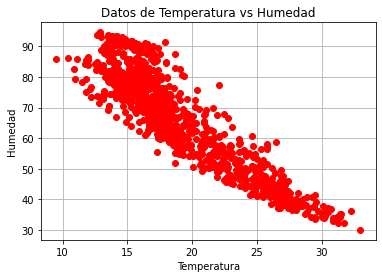

In [349]:
temp_datax = var_df.field1.dropna().tolist()
hum_datay = var_df.field2.dropna().tolist()

#Graficar datos
plt.plot(temp_datax, hum_datay, 'ro')
plt.xlabel('Temperatura')
plt.ylabel('Humedad')
plt.title('Datos de Temperatura vs Humedad')
#Hacer que se vea bien
plt.grid(True)
#Cambiar de diseño
plt.style.use('ggplot')
#Guardar
plt.savefig('D:\HomeLab\Temp_vs_Hum\Modelos\\temp_hum.png')
#Mostrar
plt.show()

x_times_y_data = []
for i in range(len(temp_datax)):
    x_times_y_data.append(temp_datax[i] * hum_datay[i])

x_squared_data = []
for i in range(len(temp_datax)):
    x_squared_data.append(temp_datax[i] ** 2)

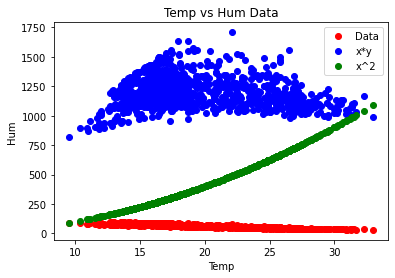

In [341]:
temp_datax_sum = abs(sum(temp_datax))
temp_datax_squared_sum = sum(x_squared_data)
x_times_y_data_sum = sum(x_times_y_data)
hum_datay_sum = sum(hum_datay)

#previsualize data
plt.plot(temp_datax, hum_datay, 'ro')
plt.plot(temp_datax, x_times_y_data, 'bo')
plt.plot(temp_datax, x_squared_data, 'go')

#Assign Lables to the graph
plt.xlabel('Temp')
plt.ylabel('Hum')
plt.title('Temp vs Hum Data')

#Assign legend to the graph
plt.legend(['Data', 'x*y', 'x^2'])

plt.show()


In [342]:
## m = (nΣxy - ΣxΣy) / (nΣx^2 - Σx^2)
## b = (Σy Σx^2 - Σxy Σx) / (nΣx^2 - Σx^2)

m = (len(temp_datax) * x_times_y_data_sum - temp_datax_sum * hum_datay_sum) / (len(temp_datax) * temp_datax_squared_sum - temp_datax_sum ** 2)

b = (hum_datay_sum * temp_datax_squared_sum - x_times_y_data_sum * temp_datax_sum) / (len(temp_datax) * temp_datax_squared_sum - temp_datax_sum ** 2)



In [343]:
print(f"y = {m}x + {b}")

y = -3.0962916353390315x + 125.52202383186629


In [344]:
#function to predict the value of y
def predict_y(x):
    return m * x + b

#Calculate coefficient of determination
def r_squared(y_actual, y_predicted):
    numerator = sum([(y_actual[i] - y_predicted[i]) ** 2 for i in range(len(y_actual))])
    denominator = sum([(y_actual[i] - np.mean(y_actual)) ** 2 for i in range(len(y_actual))])
    r_squared = 1 - (numerator / denominator)

    #Calculate mean absolute error
    mean_absolute_error = sum([abs(y_actual[i] - y_predicted[i]) for i in range(len(y_actual))]) / len(y_actual)

    #Calculate mean squared error
    mean_squared_error = sum([(y_actual[i] - y_predicted[i]) ** 2 for i in range(len(y_actual))]) / len(y_actual)

    #Calculate standard error
    standard_error = np.sqrt(mean_squared_error)

    return r_squared, mean_absolute_error, mean_squared_error, standard_error

y_predicted = []
for v in range(len(temp_datax)):
    y_predicted.append(predict_y(temp_datax[v]))

#Print the R-squared value
print(f"R-squared value: {r_squared(hum_datay, y_predicted)}")


R-squared value: (0.8434257315392286, 5.140421579067575, 42.28806033935213, 6.502927059359664)


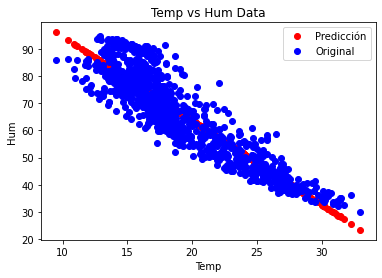

In [345]:
#Plot the predicted values vs actual values
plt.plot(temp_datax, y_predicted, 'ro')
plt.plot(temp_datax, hum_datay, 'bo')
plt.xlabel('Temp')
plt.ylabel('Hum')
plt.title('Temp vs Hum Data')
plt.legend(['Predicción', 'Original'])
plt.show()